# Project 1: Titanic SUrvival Prediction

#### What you will learn?
* Data loading & exploration (Pandas, Seaborn, Matplotlib)
* Feature preprocessing (handling missing values, encoding categorical data, scaling)
* Model training (Logistic Regression, Random Forest, etc.)
* Model evaluation (accuracy, confusion matrix, ROC-AUC)

# *Step 1: Setup the Environment*

#### First, ensure you have the libraries installed:

pip install pandas numpy matplotlib seaborn scikit-learn

#### Possible Errors
1. ModuleNotFoundError - means library not installed. Fix with pip install package_name
2. Version conflicts - we'll keep everything recent (Python 3.9+ recommended)

# *Step 2: Load Dataset*

We will use the Kaggle Titanic dataset. If you don’t already have it, download from Kaggle (train.csv & test.csv).

### Dataset Links
1. train.csv - https://www.kaggle.com/datasets/hesh97/titanicdataset-traincsv
2. test.csv - https://www.kaggle.com/datasets/diyanandy/testcsv

In [18]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

#Load dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print("Training Data Shape:", train_df.shape)
print("Testing Data Shape:", test_df.shape)
print(train_df.head)

Training Data Shape: (891, 12)
Testing Data Shape: (200000, 25)
<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry

#### This gives you the first glance at the dataset

# *Step 3: Explore the Data (EDA)*

#### Let's visualize survival counts and relations

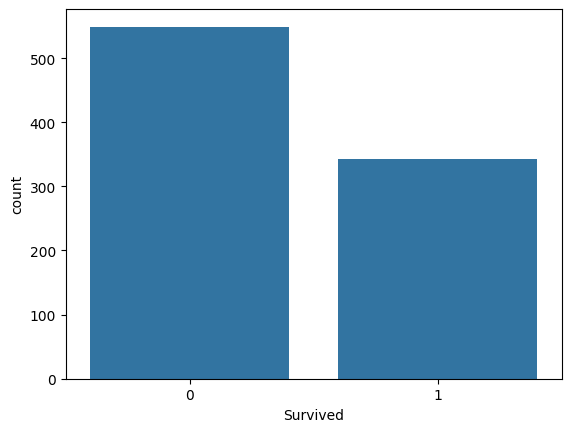

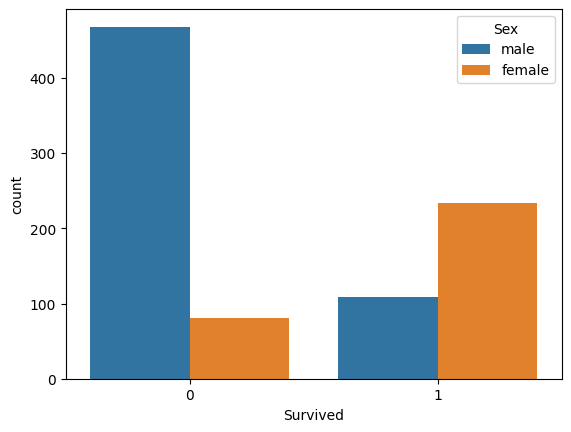

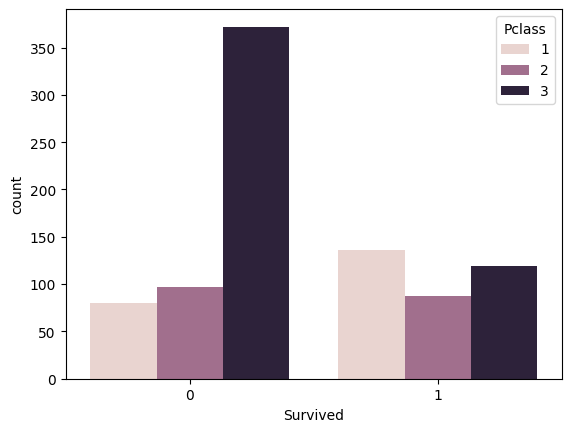

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#Survival count
sns.countplot(x="Survived", data=train_df)
plt.show()

#Survival by gender
sns.countplot(x="Survived", hue="Sex", data=train_df)
plt.show()

#Survival by passenger class
sns.countplot(x="Survived", hue="Pclass", data=train_df)
plt.show()

# *Step 4: Data Preprocessing*

* Fill missing values
* Convert categorical to numeric (Sex, Embarked)
* Drop irrelevant columns (Name, Ticket, Cabin)

In [19]:
from sklearn.preprocessing import LabelEncoder

#Fill missing values
train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)

#Convert categorical to numeric
le = LabelEncoder()
train_df["Sex"] = le.fit_transform(train_df["Sex"])
train_df["Embarked"] = le.fit_transform(train_df["Embarked"])

#Drop unnecessary columns
train_df = train_df.drop(["Name", "Ticket", "Cabin"], axis=1)

print(train_df.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         2
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         2
3            4         1       1    0  35.0      1      0  53.1000         2
4            5         0       3    1  35.0      0      0   8.0500         2


# *Step 5: Train/Test Split & Model*

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

#Features & target
x = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

#Split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

#Model
model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)

#Predictions
y_pred = model.predict(x_val)

#Evaluation
print("Accuracy", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]


#### This gives you your first ML pipeline!
##### Loading -> Preprocessing -> Training -> Evaluation

Now let's push it further so you don't just stop at *accuracy*, but actually make the model *better* and understand where it struggles.

# *Step 6: Model Evaluation & Insights*

##### 1. Check Accuracy
   * Accuracy alone can mislead (especially if the dataset is imbalanced)
   * So let's add Precision, Recall, and F1-score:

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



##### This will show:
* Precision of predicted survivors, how many truly survived?
* Recall of actual survivors, how many did we catch?
* F1-score - Balance between precision & recall    

##### 2. Confusion Matrix Heatmap

Let’s visualize the confusion matrix:

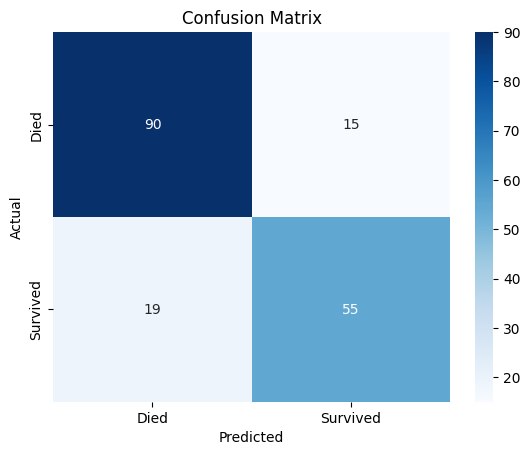

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Died", "Survived"], yticklabels=["Died", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

This will clearly show where your model misclassifies (e.g., predicting survivors as dead)

# *Step 7: Try Stronger Models*

##### Logistic Regression is simple. Let's test *Random Forest* (much better for mixed data like Titanic).

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

rf_pred = rf_model.predict(x_val)

print("Random Forest Accuracy:", accuracy_score(y_val, rf_pred))
print(classification_report(y_val, rf_pred))

Random Forest Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# *Step 8: Feature Importance*

##### See which features actually mattered in predictions:

In [25]:
import numpy as np

feature_importances = rf_model.feature_importances_
features = x.columns

for feature, importance in sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")

Sex: 0.2536
Fare: 0.1930
PassengerId: 0.1905
Age: 0.1696
Pclass: 0.0829
SibSp: 0.0444
Parch: 0.0330
Embarked: 0.0330


##### This tells you if Sex, Age, Pclass, Fare were the most influential.